<a href="https://colab.research.google.com/github/ananya07105/Swma_lab/blob/main/Twitter_cloud(Exp_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
consumer_key="CR3oAVsAax9dfOrWGCgcfeTWk"
consumer_secret="B793cNTunhZ3wwMkm8Upi208KmXKkuQD6yGhgC9bJD2yuQBMFQ"
access_token="1493170422762045440-TPsRwULM91tI4Tgl4LJq6c2D7yOWVW"
access_token_secret="QHGanqoBnItORIABJZpPRfPw3klbQZSJ4DsELpdGirdqg"
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
cursor=tweepy.Cursor(api.user_timeline,id='SrBachchan',tweet_mode="extended").items(1)

In [ ]:
for i in cursor:
  print(i.full_text)

T 4226 - Every second counts .. 
Proudly presenting the trailer of Ajay Devgn’s directorial film Runway 34 .. We are ready for take-off .. 
#Runway34Trailer 

https://t.co/FV2BjeXftO

@ajaydevgn @Rakulpreet @bomanirani @CarryMinati @ADFFilms


In [ ]:
posts=api.user_timeline(screen_name="SrBachchan", count=100,lang="en",tweet_mode="extended")
i=1
for tweet in posts[0:5]:
  print(str(i)+'.'+' '+tweet.full_text + '\n')
  i=i+1

1. T 4226 - Every second counts .. 
Proudly presenting the trailer of Ajay Devgn’s directorial film Runway 34 .. We are ready for take-off .. 
#Runway34Trailer 

https://t.co/FV2BjeXftO

@ajaydevgn @Rakulpreet @bomanirani @CarryMinati @ADFFilms

2. T 4226 - #Runway34Trailer landing today at 2.14pm ..

@ajaydevgn @Rakulpreet @bomanirani @CarryMinati @ADFFilms https://t.co/H61f6eQf4l

3. T 4226 - prayers for calm and peace ..

4. T 4225 - Runway 34 trailer landing tomorrow at 2.14pm ..

#Runway34TrailerOnMarch21
@ajaydevgn @Rakulpreet @bomanirani @CarryMinati @ADFFilms https://t.co/Y8IgaGMJAu

5. T 4225 - पहुँच गए, और नया काम शुरू  !



In [ ]:
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
def clean_text(text):
  text=re.sub(r'@[A-Za-z0-9]+',' ',text) #for removing '@' mentions
  text=re.sub(r'#','',text) #for removing the '#' symbol
  text=re.sub(r'http\S+',' ',text) #for removing URL's
  text=re.sub(r'\n','',text)

  #removing emojis from text
  re_emo=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  text= re_emo.sub(r' ' , text)
  return text

In [ ]:
df['Tweets']=df['Tweets'].apply(clean_text)
df

,Tweets
0,T 4226 - Every second counts .. Proudly presen...
1,T 4226 - Runway34Trailer landing today at 2.14...
2,T 4226 - prayers for calm and peace ..
3,T 4225 - Runway 34 trailer landing tomorrow at...
4,"T 4225 - पहुँच गए, और नया काम शुरू !"
...,...
95,T 4196 - ... first day .. first shot .. first...
96,T 4196 - Inke kartuton pe kabhi nahi lagega ta...
97,T 4196 - Lateef Zaidi ki fight judgement ke li...
98,T 4195 - .. what an amount of debate resonated...


(-0.5, 999.5, 899.5, -0.5)

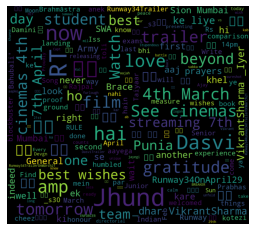

In [ ]:
#to join all the sentences together
allw=' '.join([t for t in df['Tweets']])

#for wordcloud
wc=WordCloud(width=1000,height=900,random_state=20,max_font_size=100).generate(allw)
plt.imshow(wc)
plt.axis('off')